In [1]:
import pandas as pd

In [2]:
!pip install scikit-learn==1.0.2.


Defaulting to user installation because normal site-packages is not writeable


In [3]:
df =pd.read_csv('car.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape


(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
print(df['Seller_Type'].unique())

['Dealer' 'Individual']


In [9]:
print(df['Transmission'].unique())

['Manual' 'Automatic']


In [10]:
print(df['Year'].unique())

[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


In [11]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [14]:
final_dataset.sample(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
92,2005,3.51,13.70,75000,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
60,2013,6.95,18.61,40001,Petrol,Dealer,Manual,0
15,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
126,2017,0.90,0.95,1300,Petrol,Individual,Manual,0


In [15]:
final_dataset['Current_Year']=2023

In [16]:
final_dataset['Total_Year']=final_dataset['Current_Year']-final_dataset['Year']

In [17]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [18]:
final_dataset.drop(['Current_Year'],axis=1,inplace=True)

In [19]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Total_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [20]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']


In [21]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [22]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Total_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [23]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Total_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Total_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [24]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [25]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

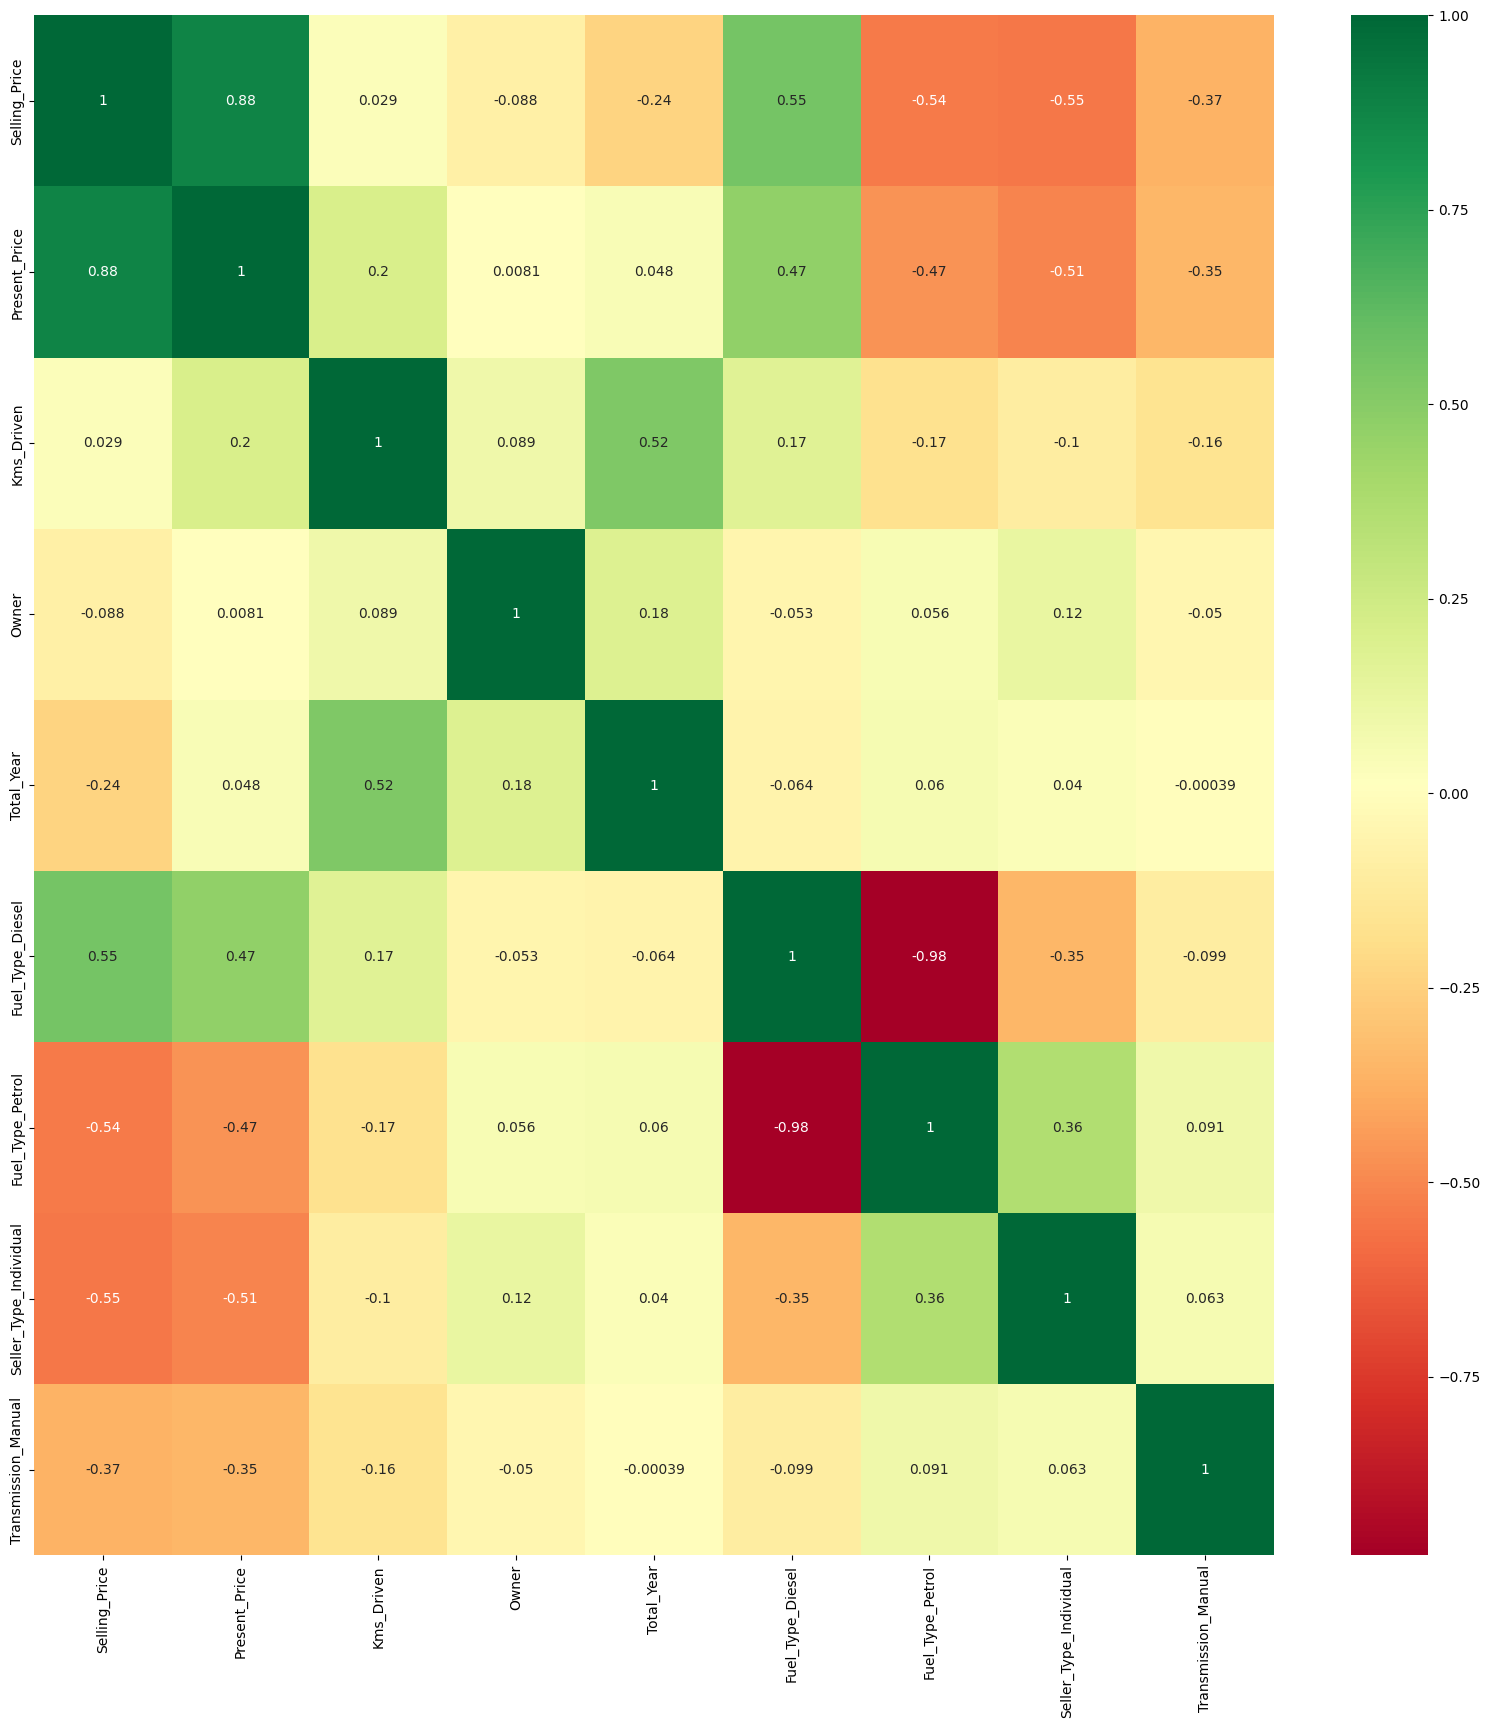

In [27]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [28]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [29]:
X.head()

,Present_Price,Kms_Driven,Owner,Total_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


In [30]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [32]:
print(model.feature_importances_)

[3.98737674e-01 4.27086918e-02 3.14864297e-04 7.68958685e-02
 2.08536520e-01 1.30252043e-02 1.29389214e-01 1.30391962e-01]


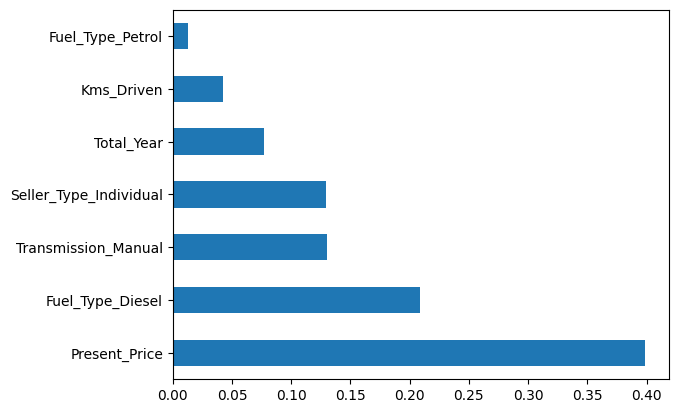

In [33]:
feature_importances=pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(7).plot(kind='barh')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [35]:
X_train.shape

(240, 8)

In [36]:
!pip install numpy 

Defaulting to user installation because normal site-packages is not writeable


In [37]:
import numpy as np

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [39]:
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [40]:
max_features= ['auto','sqrt']
#max number of level in tree
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
#max_depth.append(None)
#min number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#min number of samples required at each leaf nodes
min_samples_leaf = [1, 2, 5, 10]

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [43]:
rf = RandomForestRegressor()

In [44]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state =42,n_jobs=1)

In [45]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [46]:
predictions=rf_random.predict(X_test)

In [47]:
predictions

array([ 5.26437749,  5.52983545,  0.61905511,  7.5586488 ,  0.46807556,
        7.14974005,  0.56714837,  6.89605406,  0.66991563,  0.53682419,
        0.41715155,  4.4942454 ,  5.36587671,  3.25124526,  1.1515848 ,
        0.24906663, 10.67036529,  1.30027896,  5.15805404,  1.13157719,
        0.63568291,  9.85461504,  0.42723522,  3.59570249,  1.11603256,
        5.63974799,  5.43174817,  5.04534047,  5.96514732,  0.43154601,
       10.19491768,  4.91642161,  0.49333231, 21.55708654,  2.87841153,
        5.63974799,  5.09134959,  4.19426021,  4.16733772,  5.24949946,
        7.53299796,  6.84489815,  2.93319752,  2.72034944,  6.86024677,
        3.80882863,  0.5630664 ,  5.55618061,  3.24506792,  5.35886864,
       10.48261807,  4.47314782,  3.42553761,  7.55557026,  0.44015909,
        0.68862281,  4.40608695,  1.96262039, 21.42074525,  0.22625692,
        0.3375807 ])

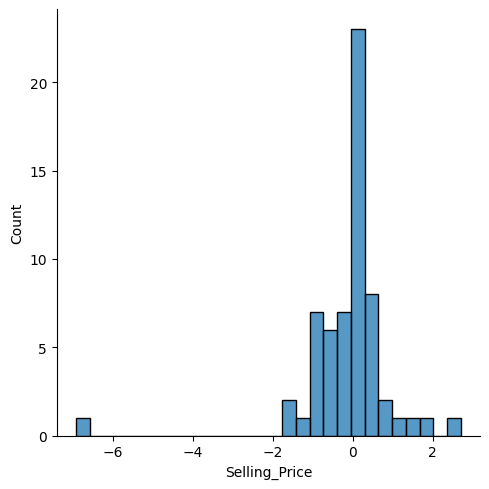

In [48]:
sns.displot(y_test-predictions)

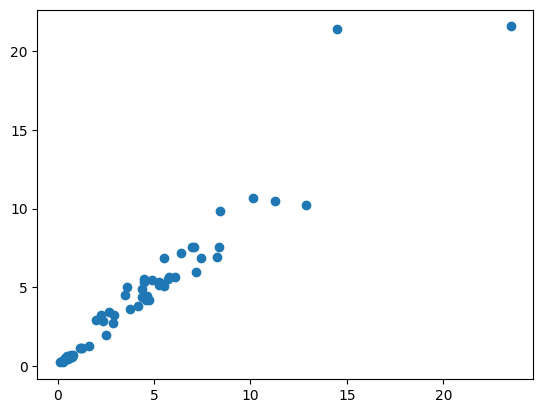

In [49]:
plt.scatter(y_test,predictions)

In [50]:
import pickle
file =open('random_forest_regression_model.pkl','wb')

pickle.dump(rf_random,file)